In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('./data/spam.csv',encoding='latin-1')

In [3]:
train_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
train_df = train_df[['v1','v2']]
train_df.columns = ['label','message']
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
train_df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
"""
文本预处理
不同于之前的titanic项目那种结构化数据
文本的需要进行预处理，比如：
1.分词（从句子中拆分出单词）
2.停用词处理（去除the, a ,is等常见但无实际意义的词）
3.词干提取（比如将runnig转换到原始形式run）
4.词性标注等

文本数据预处理需要两个库。
一个是nltk这是一个自然语言处理工具包，包含我上面说的那四个作用
一个是re库，这是一个正则表达式的库函数
stopwords是停用词库函数
PorterStemmer是词干提取库函数
word_tokenize是分词库函数
"""

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

"""
首先，这里要声明，punkt分词器和stopwords停用词等都是独立的资源文件
这些数据包很大，所以NLTK设计为按需下载
以下代码可以保证我下一次运行代码的时候不会重复下载
"""

# 下载必要的nltk数据
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
    print("NLTK数据已存在，无需下载")
except LookupError:
    print("正在下载NLTK必要数据...")
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('wordnet')
    nltk.download('punkt_tab')
    print("NLTK数据下载完成！")


NLTK数据已存在，无需下载


In [8]:
#初始化上述工具
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    完整的文本预处理流程
    """

    # 1.转小写
    text = text.lower()

    # 2. 匹配所有非字母非空白的字符（算一个小清洗）
    text = re.sub(r'[^a-zA-Z\s]','',text)

    # 3. 分词,拆分成数组
    words = word_tokenize(text)

    # 4. 移除停用词
    words = [word for word in words if word not in stop_words]

    # 5. 词干提取
    words = [stemmer.stem(word) for word in words]

    #最终变成我们想要的句子
    return ' '.join(words)

print('开始预处理文本。。。')
#创建一个新栏目，这个栏目是预处理完
train_df['processed_message'] = train_df['message'].apply(preprocess_text)
# 查看预处理前后的对比
print("=== 预处理前后对比 ===")
for i in range(3):
    print(f"原始: {train_df['message'].iloc[i]}")
    print(f"处理: {train_df['processed_message'].iloc[i]}")
    print("---")

开始预处理文本。。。
=== 预处理前后对比 ===
原始: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
处理: go jurong point crazi avail bugi n great world la e buffet cine got amor wat
---
原始: Ok lar... Joking wif u oni...
处理: ok lar joke wif u oni
---
原始: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
处理: free entri wkli comp win fa cup final tkt st may text fa receiv entri questionstd txt ratetc appli over
---


In [9]:
"""
或许会有一个疑问，为什么要大费周章的去把这些字母弄成小写，提取词根，删除一个停用词。
这个NLP的hello word项目里，不是应该直接掉库然后分析其中的message就行了吗？
一个个来解释：
1. 为什么要小写？
  实际上我们发现Jack 和 jack 和 JACK 对于我们人类来说是一个词，但是计算机不那么认为，所以统一转成小写来说更能让计算机使用这个文本

2. 为什么要用停用词？
  说白了减少废话！一些the， a，这些对于我们现实来说不是废话，但是对于模型来说是个废话甚至是噪音。

3. 为什么要提取词根？
    "running"、"runs"、"ran"都是"run"的不同形式。词干提取将它们都还原为"run"。这样计算机就知道这些词属于同一类别，避免重复计数

举个例子：
原始文本: "You have WON a FREE iPhone! Click the link to claim your prize."
预处理后: "won free iphone click link claim prize"
核心信息完全保留，但去除了干扰项，让垃圾短信的特征（won, free, iphone, claim等）更加突出！

再举个例子，我们接下来要提取关键词，如果我们不进行预处理，那么结果如下：
you: 100次 (无意义)
the: 80次 (无意义)
a: 70次 (无意义)
won: 1次 (被"WON!!!"冲淡)
free: 1次

但是如果我们机型了预处理：
you: 100次 (无意义)
the: 80次 (无意义)
a: 70次 (无意义)
won: 1次 (被"WON!!!"冲淡)
free: 1次
"""

"""
现在，开始关键词特征提取，先看看正常短信和垃圾短信的关键词情况
"""
from collections import Counter

def analyze_keywords(df,label,top_n=20):
    texts = df[df['label'] == label]['processed_message']
    all_words = []
    for text in texts:
        words = text.split()#words的结果是一个字符串数组，比如：['hello', 'world', 'this', 'is', 'test']
        all_words.extend(words)#注意！不能用append代替，否则就是[['hi'], ['hi','jack']] ← 嵌套结构！而不是['hi','hi','jack']
    word_counts = Counter(all_words)
    return word_counts.most_common(top_n)#注意！most_common返回的是元组列表[('free', 168), ('txt', 136), ('call', 123),  ...]

print('-------------垃圾短信的关键词--------')
spam_df = pd.DataFrame(analyze_keywords(train_df,'spam'),columns=['关键词','出现次数'])
print(spam_df)

print('--------------普通短信出现次数-----------')
ham_df = pd.DataFrame(analyze_keywords(train_df,'ham'),columns=['关键词','出现次数'])
print(ham_df)




-------------垃圾短信的关键词--------
       关键词  出现次数
0     call   369
1     free   219
2      txt   164
3        u   155
4       ur   144
5     text   139
6    mobil   136
7     stop   116
8    claim   115
9    repli   110
10   prize    94
11     get    87
12       p    73
13    tone    73
14   nokia    72
15  servic    72
16    send    69
17     new    69
18   award    67
19    week    63
--------------普通短信出现次数-----------
     关键词  出现次数
0      u   988
1     im   462
2     go   416
3    get   364
4   come   292
5   call   287
6   ltgt   276
7     ok   272
8   dont   268
9    got   244
10  know   244
11  like   242
12   ill   242
13    ur   240
14  love   234
15  good   223
16  time   220
17   day   219
18  want   212
19  need   175


Text(0.5, 1.0, 'the informations of spam_ham')

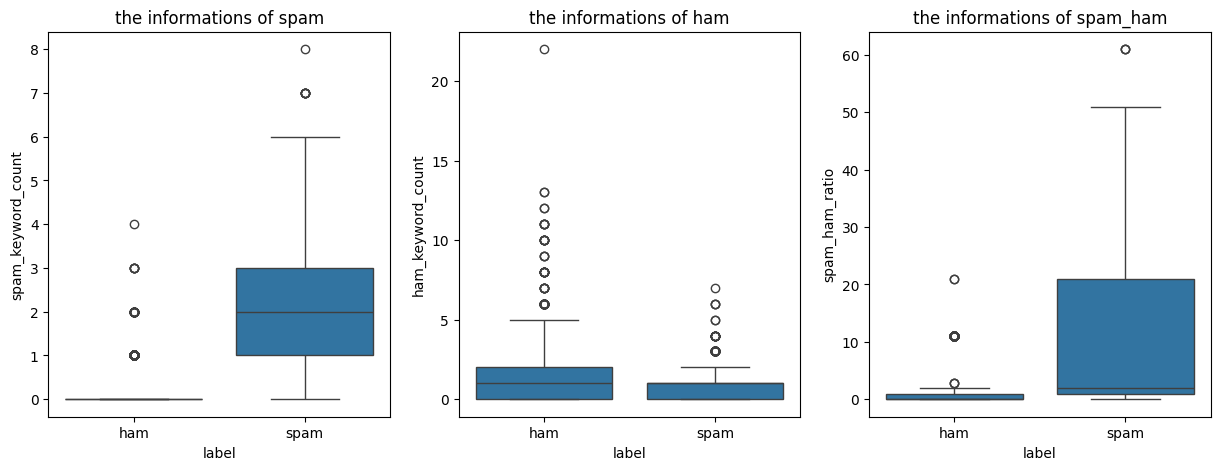

In [10]:
"""
可以考虑提取三个特征
一个是这个消息的好关键词个数
一个是这个消息的坏关键词个数
再来看看这个消息的好坏关键词比率
"""

spam_keywords_list = ['free', 'txt', 'text', 'mobil', 'stop', 'claim', 'repli', 'prize', 
                     'tone', 'nokia', 'servic', 'send', 'award']

ham_keywords_list = ['u', 'im', 'go', 'get', 'come', 'ltgt', 'ok', 'dont', 'got', 'know',
                    'like', 'ill', 'ur', 'love', 'good', 'time', 'day', 'want', 'need']

#统计关键词个数
def count_number(text,keyword_list):
    count = 0
    for word in text.split():
        if word in keyword_list:
            count += 1
    return count

#坏关键词统计
train_df['spam_keyword_count'] = train_df['processed_message'].apply(
    lambda x:count_number(x,spam_keywords_list)
)
#好关键词统计
train_df['ham_keyword_count'] = train_df['processed_message'].apply(
    lambda x:count_number(x,ham_keywords_list)
)

#关键词比例
train_df['spam_ham_ratio'] = (train_df['spam_keyword_count']+0.1)/(train_df['ham_keyword_count']+0.1)

plt.figure(figsize=(15, 5))
#如果我要绘制三张图，那么必须指定subplot
plt.subplot(1,3,1)
sns.boxplot(data=train_df,x='label',y='spam_keyword_count')
plt.title('the informations of spam')

plt.subplot(1,3,2)
sns.boxplot(data=train_df,x='label',y='ham_keyword_count')
plt.title('the informations of ham')

plt.subplot(1,3,3)
sns.boxplot(data=train_df,x='label',y='spam_ham_ratio')
plt.title('the informations of spam_ham')



<Axes: xlabel='label', ylabel='ham_keyword_count'>

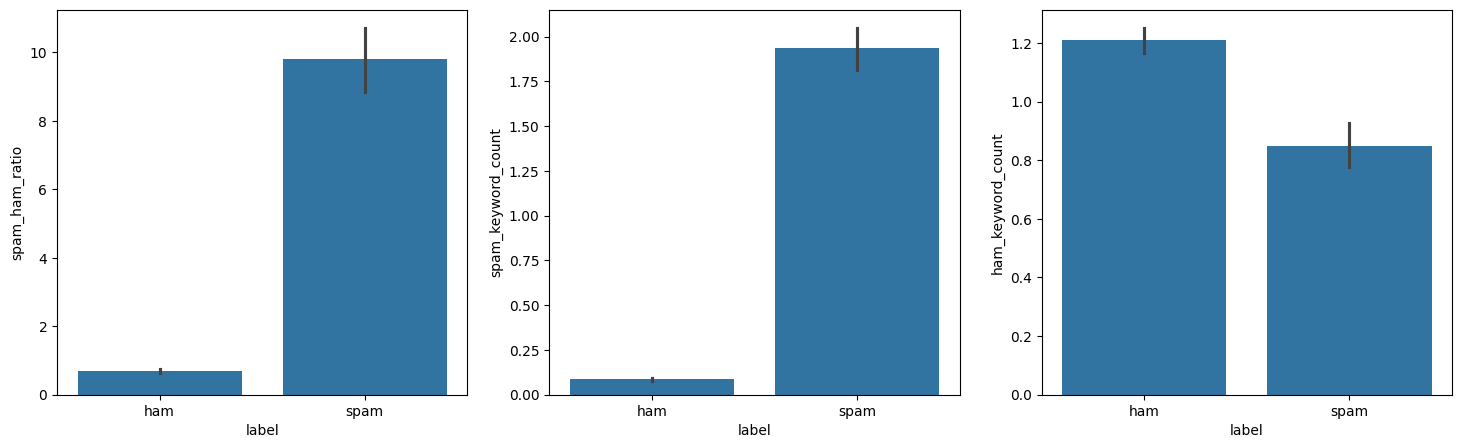

In [11]:
"""
箱型图表现很明显，来看看barplot图吧
"""
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.barplot(data=train_df,x='label',y='spam_ham_ratio')

plt.subplot(1,3,2)
sns.barplot(data=train_df,x='label',y='spam_keyword_count')

plt.subplot(1,3,3)
sns.barplot(data=train_df,x='label',y='ham_keyword_count')

C:\Users\汪博艺\AppData\Local\Temp\ipykernel_28624\1719969027.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='label', y='message_length',


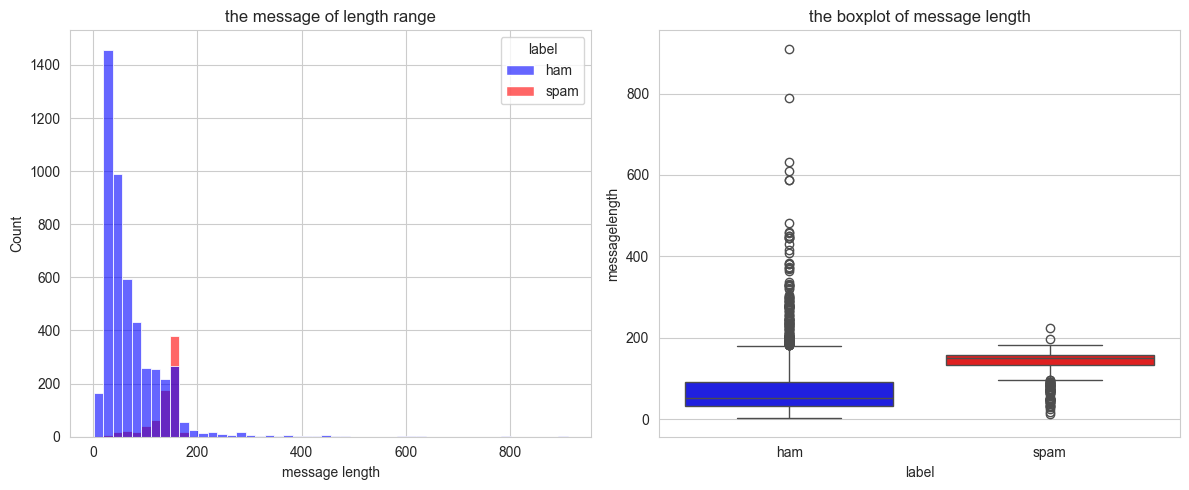

=== 消息长度统计 ===
正常短信长度统计:
count    4825.000000
mean       71.023627
std        58.016023
min         2.000000
25%        33.000000
50%        52.000000
75%        92.000000
max       910.000000
Name: message_length, dtype: float64
垃圾短信长度统计:
count    747.000000
mean     138.866131
std       29.183082
min       13.000000
25%      132.500000
50%      149.000000
75%      157.000000
max      224.000000
Name: message_length, dtype: float64


In [12]:
"""
文本这种非结构化的特征不同于之前titanic那种结构化特征
文本是非结构化特征，这需要我们提取文本数据中的特征，把文字转化为计算机能理解的数字语言
那么先从文本的长度来看看特征吧
请出我们的老朋友histplot来看看两个消息的对比情况
"""
train_df['message_length'] = train_df['message'].apply(len)

# 设置图形风格
sns.set_style("whitegrid")

# 1. 消息长度分布图 - 使用seaborn
plt.figure(figsize=(12, 5))

# 使用displot或histplot来绘制分布
plt.subplot(1, 2, 1)
sns.histplot(data=train_df, x='message_length', hue='label', bins=50, alpha=0.6, 
             palette={'ham': 'blue', 'spam': 'red'})
plt.title('the message of length range')
plt.xlabel('message length')

# 2. 箱线图显示长度分布
plt.subplot(1, 2, 2)
sns.boxplot(data=train_df, x='label', y='message_length', 
            palette={'ham': 'blue', 'spam': 'red'})
plt.title('the boxplot of message length')
plt.xlabel('label')
plt.ylabel('messagelength')

plt.tight_layout()
plt.show()

# 3. 统计信息
print("=== 消息长度统计 ===")
print("正常短信长度统计:")
print(train_df[train_df['label']=='ham']['message_length'].describe())
print("垃圾短信长度统计:")
print(train_df[train_df['label']=='spam']['message_length'].describe())



Text(0, 0.5, 'ratio')

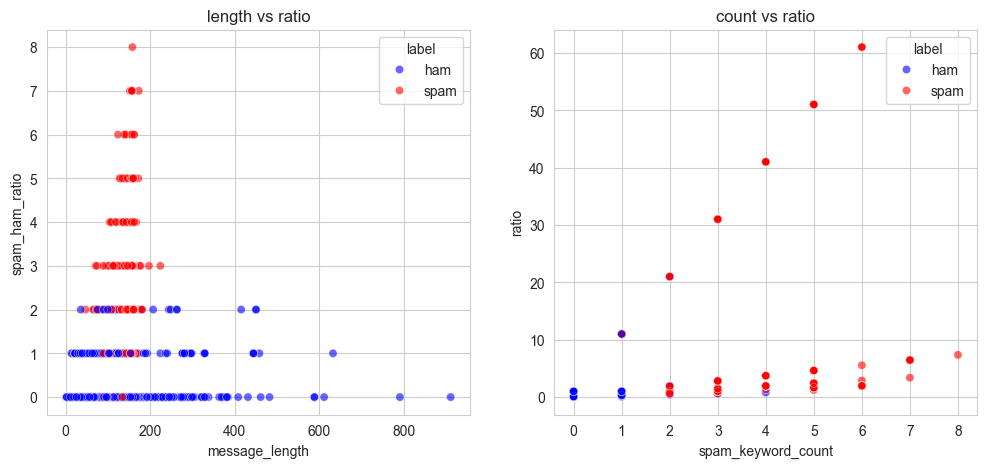

In [13]:
"""
从最开始我确实看出长度对垃圾短信和正常短信有着很明显的一个区分度。
无论从histplot或者boxplot都可以看出正常短信和垃圾短信的区分度
但是我注意到也有很多正常短信是在138——157之间的，所以我最开始的想法是————如果以长度来评判，是可以区
分很多垃圾短息，但也会误判很多正常短信（boxplot中的异常值也让我误判了这一错误观点）
但事实是：
1. 长度不是评判的唯一标准，它只是其中一个辅助特征的标准
2. 模型没那么笨，它自己会规避这些离谱的偏值
因此消息长度是观察出来的很好的一个特征。
我想起iris的项目，我进行了一个猜想————垃圾短信有更明显的长度，更多的垃圾关键词，更高的垃圾：正常词的比例
"""
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(data=train_df,x='message_length',y='spam_keyword_count',hue='label',
                alpha=0.6,palette={'ham':'blue','spam':'red'}
               )
plt.title('length vs ratio')
plt.xlabel('message_length')
plt.ylabel('spam_ham_ratio')

plt.subplot(1,2,2)
sns.scatterplot(data=train_df,x='spam_keyword_count',y='spam_ham_ratio',hue='label',
                alpha=0.6,palette={'ham':'blue','spam':'red'}
               )
plt.title('count vs ratio')
plt.xlabel('spam_keyword_count')
plt.ylabel('ratio')

In [14]:
"""
还是我之前说的，长度这个特征或许不是一个特别好的特征，但它和其它特征组合在一起很可能会更好的预测出我们想要的数据！
现在开始模型训练
"""
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = train_df[['message_length','spam_keyword_count','spam_ham_ratio']]
y = train_df['label']#麻烦记住现在我让y=train_df['label']了！后面的所有y都是train_df['label']

#标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(
    X_scaled,y,test_size=0.2,random_state=42,stratify=y
)

# 初始化多个模型
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM (Linear)': SVC(kernel='linear', random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# 交叉验证评估
print("\n=== 交叉验证结果 (5折) ===")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    cv_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
    print(f"{name}: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

# 训练并在测试集上评估最佳模型
print("\n=== 测试集性能 ===")
best_model = None
best_accuracy = 0

#模型训练
for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print(f"\n{name} 准确率: {accuracy:.4f}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

# 详细分析最佳模型
print(f"\n🎯 最佳模型: {type(best_model).__name__}")
print(f"测试集准确率: {best_accuracy:.4f}")


=== 交叉验证结果 (5折) ===
Logistic Regression: 0.9354 (±0.0039)
SVM (Linear): 0.9388 (±0.0044)
SVM (RBF): 0.9458 (±0.0021)
Random Forest: 0.9442 (±0.0032)

=== 测试集性能 ===

Logistic Regression 准确率: 0.9390

SVM (Linear) 准确率: 0.9480

SVM (RBF) 准确率: 0.9525

Random Forest 准确率: 0.9561

🎯 最佳模型: RandomForestClassifier
测试集准确率: 0.9561


In [15]:
"""
以上是NLP的基本处理情况
实际上，NLP不单单是有单纯的数据预处理（比如之前提到的分词，停用词，抓词根）
还有很重要的两部分是我们没有用的：
1. TF-IDF
2. n-gram

先来说TF-IDF，像我们之前弄的关键词个数，对于TF-IDF来说，它不仅仅是记录词频，还要为每个词分配其权重
也就是更加保证了一些正常短信不会被误判，比如之前在垃圾短信关键词里，权重最高的几个词
free win prize
 但如果正常短信中也经常说："I'm free to meet"，"win a game"，"prize winner"
 我的方法会给这些词高权重，但实际上它们没有区分度
 TF-IDF会自动发现：
 - "free" 在很多文档中都出现 → 权重降低  
 - "claim" 主要在垃圾短信中出现 → 权重提高
 - "urgent" 主要在垃圾短信中出现 → 权重提高
"""

#1.创建TF-IDF向量
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    max_features = 1000,
    stop_words = 'english',#自动移除英文停用词
    ngram_range=(1,1) #默认的1-gram
)

#2. 应用TF-IDF到文本数据
X_tfidf = tfidf_vectorizer.fit_transform(train_df['processed_message'])

# 3. 查看特征矩阵的形状
print(f"TF-IDF特征矩阵形状: {X_tfidf.shape}")
print(f"样本数: {X_tfidf.shape[0]}")
print(f"特征数(词汇表大小): {X_tfidf.shape[1]}")

# 4. 查看一些重要的特征（词）
feature_names = tfidf_vectorizer.get_feature_names_out()
print("\n=== 最重要的20个TF-IDF特征 ===")
for i, feature in enumerate(feature_names[:20]):
    print(f"{i+1}. {feature}")

# 5. 查看TF-IDF权重示例
print("\n=== TF-IDF权重示例 ===")
sample_idx = 0  # 看第一个样本
sample_vector = X_tfidf[sample_idx].toarray().flatten()

# 找到权重最高的词
top_indices = sample_vector.argsort()[-5:][::-1]
print(f"样本内容: {train_df['message'].iloc[sample_idx][:50]}...")
for idx in top_indices:
    if sample_vector[idx] > 0:  # 只显示有权重的特征
        print(f"  '{feature_names[idx]}': {sample_vector[idx]:.4f}")

TF-IDF特征矩阵形状: (5572, 1000)
样本数: 5572
特征数(词汇表大小): 1000

=== 最重要的20个TF-IDF特征 ===
1. abiola
2. abl
3. abt
4. accept
5. access
6. account
7. activ
8. actual
9. ad
10. add
11. address
12. admir
13. aft
14. afternoon
15. age
16. ago
17. ah
18. aha
19. ahead
20. aight

=== TF-IDF权重示例 ===
样本内容: Go until jurong point, crazy.. Available only in b...
  'la': 0.4314
  'crazi': 0.4075
  'avail': 0.4001
  'point': 0.3593
  'world': 0.3576


In [16]:
"""
这里会有疑惑，为啥之前要手动写函数来统计关键词而这里只用声明TF-IDF后就直接用库函数就统计出带权值的词频结果了
这正是TF-IDF库的强大，只用对train_X进行fit_transform即可,而不用一个个再来手动统计关键词，还要计算什么spam_ham_ratio
而且给出的结果还更好的让我们进行预测，代码如下
"""

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(
    X_tfidf, train_df['label'], test_size=0.2, random_state=42, stratify=y
)

best_accuracy = 0
#模型训练（务必记住代码流程）
for name,model in models.items():
    model.fit(X_train_tfidf,y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test,y_pred)
    print(f"{name}: {accuracy:.4f}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy

# 与之前的手工特征对比
print(f"\n=== 对比之前的手工特征 ===")
print(f"手工特征准确率: 0.9561")
print(f"TF-IDF特征准确率: {best_accuracy:.4f}")
    

Logistic Regression: 0.9668
SVM (Linear): 0.9812
SVM (RBF): 0.9812
Random Forest: 0.9767

=== 对比之前的手工特征 ===
手工特征准确率: 0.9561
TF-IDF特征准确率: 0.9812


In [17]:
"""
TF-IDF广泛用于NLP里面，计算出每个单词的权值，得出一个键值对数据
比如在该项目里，得出的1000个键值对信息，我们完全把它抽象出了1000个特征。
我们用这1000个特征完完全全的去训练数据，其准确度完全超过了我们辛苦的EDA工程里创建的3个特征然后用这3个特征训练数据的准确度
但这不代表以后我们就要放弃EDA工程，也许将其二者结合会更好，不过还是那句话，还不好不是一拍脑袋决定的，而是靠数据和实验说话的！
二者结合的方式很简单，将我们得到的EDA工程的DataFrame数据只取values，然后变成稀疏矩阵（因为TF-IDF得到的是一个稀疏矩阵）
然后再借助库函数hstack合并即可
"""

from scipy.sparse import hstack, csr_matrix

# 创建手工特征矩阵
X_manual = train_df[['message_length', 'spam_keyword_count', 'spam_ham_ratio']]

# 转换为稀疏矩阵并合并
X_manual_sparse = csr_matrix(X_manual.values)
X_combined = hstack([X_manual_sparse, X_tfidf])

print(f"合并后的特征形状: {X_combined.shape}")

# 划分训练测试集
X_train_mix, X_test_mix, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42, stratify=y
)

# 更新模型配置，增加迭代次数
models_updated = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM (Linear)': SVC(kernel='linear', random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# 训练和评估
print("\n=== 混合特征性能 ===")
best_accuracy = 0
best_model_name = ""

for name, model in models_updated.items():
    model.fit(X_train_mix, y_train)
    y_pred = model.predict(X_test_mix)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{name}: {accuracy:.4f}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name

print(f"\n🎯 最佳模型: {best_model_name}")
print(f"最佳准确率: {best_accuracy:.4f}")

# 对比结果
print("\n=== 性能对比 ===")
print(f"只有手工特征: 0.9561")
print(f"只有TF-IDF特征: 0.9812") 
print(f"混合特征: {best_accuracy:.4f}")


合并后的特征形状: (5572, 1003)

=== 混合特征性能 ===
Logistic Regression: 0.9632
SVM (Linear): 0.9785
SVM (RBF): 0.9139
Random Forest: 0.9758

🎯 最佳模型: SVM (Linear)
最佳准确率: 0.9785

=== 性能对比 ===
只有手工特征: 0.9561
只有TF-IDF特征: 0.9812
混合特征: 0.9785


In [18]:
"""
接下来看看NLP的另一个重要的东西N-gram
N-gram就是连续的N个组合
比如如果按照之前我们关键词的建立来说，那个是一个1-gram，["free", "iphone", "prize"] 
但是1-gram有一个问题，它无法捕捉词序和短语含义，因此它的上下文衔接不是特别好，比如：
"free gift" → 可能是垃圾短信
"gift free" → 不自然的表达，可能不是垃圾短信
因此可以借助2-gram或者3-gram.......N-gram来进行分析
比如一个2-gram的样子是这样的：垃圾短信常见["free offer", "claim now", "prize winner", "text stop", "mobile number"]

这个项目只是一个小项目，万一以后遇到更大的项目，需要更好的分析上下文时，运用N-gram十分重要的
"""

#设立一个n-gram范围
ngram_configs = [
    (1, 1),  # 只使用单个词（传统词袋）
    (1, 2),  # 使用单个词或双词组合 ← 最常用
    (2, 2),  # 只使用双词组合
    (1, 3),  # 使用1-3个词的组合
]

#使用随机森林来评估
randF = RandomForestClassifier(n_estimators=100, random_state=42)

bestaccuracy = 0
bestngram = (1,1)
for ngramRange in ngram_configs:
    vectorizer = TfidfVectorizer(ngram_range=ngramRange, max_features = 1000,stop_words = 'english')#还是之前的TF-IDF容器，只是这里我指定了用多少n-gram
    X_ngram = vectorizer.fit_transform(train_df['processed_message'])
    X_ngram_train,X_ngram_test,y_train,y_test = train_test_split(
        X_ngram, y, test_size=0.2, random_state=42, stratify=y
    )
    randF.fit(X_ngram_train,y_train)
    y_pred = randF.predict(X_ngram_test)
    accuracy = accuracy_score(y_test,y_pred)
    print(f"词组{ngramRange}: {accuracy:.4f}")
    if accuracy > bestaccuracy:
        bestaccuracy = accuracy
        bestngram = ngramRange

print(f'经过n-gram引入后的准确率:{bestaccuracy:.4f}')
print('最好的情况：',bestngram)


词组(1, 1): 0.9767
词组(1, 2): 0.9740
词组(2, 2): 0.9570
词组(1, 3): 0.9749
经过n-gram引入后的准确率:0.9767
最好的情况： (1, 1)


In [19]:
"""
这个项目里，由于数据比较少，而且分析的短信都是比较短的，所以来说1-gram最好。
但到了后期的大项目，比如LLM或者不说那么远，以后比如分析文章或者电影评论来判定情感这些项目时，或许多个词的分析会更好
那么现在开始进行调参，来调随机森林和svc的参数
"""

"""
随机森林调整树高和树的数量
SVM则调整C值，核函数
调参分析里，我们用之前titanic里用的老朋友网状交叉验证来找参数
"""
from sklearn.model_selection import GridSearchCV

vectorizer = TfidfVectorizer(
    ngram_range = (1,1),
    max_features = 1000,
    stop_words = 'english'
)

#我们更新一下之前定义的X以及再一次提醒一下y是df['label']
X = vectorizer.fit_transform(train_df['processed_message'])

# random_state确保这些随机操作可重现,随便定一个数字。
# stratify=y确保训练集和测试集中的类别比例相同,保证分割后：训练集 80% 正常，20% 垃圾；测试集 80% 正常，20% 垃圾
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size = 0.2, random_state = 42, stratify=y
)


In [22]:
"""
先来调整随机森林的参数
"""

# 1. 先调随机森林（使用较小的参数网格）

rf_param_grid_simple = {
    'n_estimators': [50,100, 200],      # 树的数量
    'max_depth': [None, 10,20],         # 最大深度
    'min_samples_split': [2, 5]      # 分裂所需最小样本数
}

print("开始随机森林参数调优（简化版）...")
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),# random_state确保这些随机操作可重现,随便定一个数字
    rf_param_grid_simple,
    cv=3,
    scoring='accuracy'
)

rf_grid.fit(X_train, y_train)
print("随机森林最佳参数:", rf_grid.best_params_)
print("随机森林最佳交叉验证分数:", rf_grid.best_score_)

开始随机森林参数调优（简化版）...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
随机森林最佳参数: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
随机森林最佳交叉验证分数: 0.9728506842010655


In [ ]:
"""
好吧，调参后分数更低了
可能最优参数不在我们设置的网格范围内，或者网格太稀疏，错过了最佳参数。
不过只要知道调参是为了找更好的预测情况以及了解影响参数就行，其它的我也不像再去找参数了。
至此，spam项目完结.
"""